# Chapter-7 data cleaning and preparation

In [124]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from numpy import nan as NA
import re

In [2]:
data = pd.Series([4,5,-8,NA,45,NA,0])
data

0     4.0
1     5.0
2    -8.0
3     NaN
4    45.0
5     NaN
6     0.0
dtype: float64

In [13]:
data.dropna()

0     4.0
1     5.0
2    -8.0
4    45.0
6     0.0
dtype: float64

In [17]:
data = pd.DataFrame([[1,2,3],[1,-8,NA],[1,NA,7]])
data

,0,1,2
0,1,2.0,3.0
1,1,-8.0,NaN
2,1,NaN,7.0


In [20]:
data.dropna()

,0,1,2
0,1,2.0,3.0


In [25]:
# data.fillna(0,mthod='ffill')

In [30]:
data.dropna(axis=1,how='all')

,0,1,2
0,1,2.0,3.0
1,1,-8.0,NaN
2,1,NaN,7.0


In [55]:
data2 = pd.DataFrame(np.arange(30).reshape((5,6)))
data2.iloc[4,:2]=NA

data2[7]=NA
data2

,0,1,2,3,4,5,7
0,0.0,1.0,2,3,4,5,NaN
1,6.0,7.0,8,9,10,11,NaN
2,12.0,13.0,14,15,16,17,NaN
3,18.0,19.0,20,21,22,23,NaN
4,NaN,NaN,26,27,28,29,NaN


In [56]:
data2.fillna({0:0,1:1.1,7:4.5})

,0,1,2,3,4,5,7
0,0.0,1.0,2,3,4,5,4.5
1,6.0,7.0,8,9,10,11,4.5
2,12.0,13.0,14,15,16,17,4.5
3,18.0,19.0,20,21,22,23,4.5
4,0.0,1.1,26,27,28,29,4.5


In [59]:

_ = data2.fillna(0, inplace=True)

In [61]:
data2

,0,1,2,3,4,5,7
0,0.0,1.0,2,3,4,5,0.0
1,6.0,7.0,8,9,10,11,0.0
2,12.0,13.0,14,15,16,17,0.0
3,18.0,19.0,20,21,22,23,0.0
4,0.0,0.0,26,27,28,29,0.0


In [68]:
dp = pd.DataFrame({'k1':['you','me']*3,
                  'k2':[1,1,1,1]+[5,8]
                  })
dp.duplicated()

0    False
1    False
2     True
3     True
4    False
5    False
dtype: bool

In [76]:
dp
dp.drop_duplicates()
dp.drop_duplicates(['k2'])

,k1,k2
0,you,1
4,you,5
5,me,8


In [77]:
dp

,k1,k2
0,you,1
1,me,1
2,you,1
3,me,1
4,you,5
5,me,8


In [78]:
data = pd.DataFrame({'food': ['bacon', 'pulled pork', 'bacon',
   ....:                               'Pastrami', 'corned beef', 'Bacon',
   ....:                               'pastrami', 'honey ham', 'nova lox'],
   ....:                      'ounces': [4, 3, 12, 6, 7.5, 8, 3, 5, 6]})

In [80]:
data

,food,ounces
0,bacon,4.0
1,pulled pork,3.0
2,bacon,12.0
3,Pastrami,6.0
4,corned beef,7.5
5,Bacon,8.0
6,pastrami,3.0
7,honey ham,5.0
8,nova lox,6.0


In [88]:
meat_to_animal = {
  'bacon': 'pig',
  'pulled pork': 'pig',
  'pastrami': 'cow',
  'corned beef': 'cow',
  'honey ham': 'pig',
  'nova lox': 'salmon'
}
lower = data['food'].str.lower()
lower
data['animal']=lower.map(meat_to_animal)
data

,food,ounces,animal
0,bacon,4.0,pig
1,pulled pork,3.0,pig
2,bacon,12.0,pig
3,Pastrami,6.0,cow
4,corned beef,7.5,cow
5,Bacon,8.0,pig
6,pastrami,3.0,cow
7,honey ham,5.0,pig
8,nova lox,6.0,salmon


In [90]:
data['food'].map(lambda x: meat_to_animal[x.lower()])

0       pig
1       pig
2       pig
3       cow
4       cow
5       pig
6       cow
7       pig
8    salmon
Name: food, dtype: object

In [131]:
data3 = pd.DataFrame(np.arange(20).reshape((5,4)),index=[1,2,3,4,5],columns=['one','two','three','four'])
data3


,one,two,three,four
1,0,1,2,3
2,4,5,6,7
3,8,9,10,11
4,12,13,14,15
5,16,17,18,19


In [100]:
# df = data
transform = lambda x: x[:4].upper()


In [123]:
df.columns=df.columns.map(transform)
df

,ONE,TWO,THRE,FOUR
city,NaN,NaN,NaN,NaN
state,NaN,NaN,NaN,NaN
country,NaN,NaN,NaN,NaN
pincode,NaN,NaN,NaN,NaN


In [126]:
df=df.reindex(index=['city','state','country','pincode'])
df.fillna(10)
# df=df.rename(index=str.title,columns=str.upper)
df

,ONE,TWO,THRE,FOUR
city,NaN,NaN,NaN,NaN
state,NaN,NaN,NaN,NaN
country,NaN,NaN,NaN,NaN
pincode,NaN,NaN,NaN,NaN


In [135]:
data3.rename(index={1: 'INDIANA'},
          columns={'three': 'peekaboo'})
data3

,one,two,three,four
1,0,1,2,3
2,4,5,6,7
3,8,9,10,11
4,12,13,14,15
5,16,17,18,19


In [6]:
ages = [20, 22, 25, 27, 21, 23, 37, 31, 61, 45, 41, 32]

bins = [18,25,35,50,61]

groups = pd.cut(ages,bins)
groups

[(18, 25], (18, 25], (18, 25], (25, 35], (18, 25], ..., (25, 35], (50, 61], (35, 50], (35, 50], (25, 35]]
Length: 12
Categories (4, interval[int64]): [(18, 25] < (25, 35] < (35, 50] < (50, 61]]

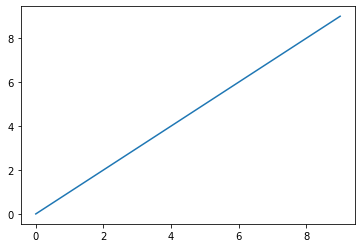

In [12]:
ser = pd.Series(np.arange(10))
# plt.plot(groups)
ser
plt.plot(ser)

In [19]:
gp = groups.codes
bins,gp
gp,ages

(array([0, 0, 0, 1, 0, 0, 2, 1, 3, 2, 2, 1], dtype=int8),
 [20, 22, 25, 27, 21, 23, 37, 31, 61, 45, 41, 32])

In [21]:
pd.value_counts(groups)  ##  counting for categorial varible 

(18, 25]    5
(25, 35]    3
(35, 50]    3
(50, 61]    1
dtype: int64

In [24]:
group_names = ['Youth', 'YoungAdult', 'MiddleAged', 'Senior']

groups = pd.cut(ages,bins,labels = group_names)
groups

['Youth', 'Youth', 'Youth', 'YoungAdult', 'Youth', ..., 'YoungAdult', 'Senior', 'MiddleAged', 'MiddleAged', 'YoungAdult']
Length: 12
Categories (4, object): ['Youth' < 'YoungAdult' < 'MiddleAged' < 'Senior']

In [65]:
df1 = pd.DataFrame(np.random.randn(1000,4))
df1.head()
df1[(np.abs(df1)>=3).any(1)]

,0,1,2,3
9,3.154096,-0.335331,0.800071,-0.304958
10,1.267629,-1.125951,-1.760389,-3.441415
12,-0.129747,-0.559802,1.702104,3.173734
56,1.536330,-1.406344,-0.451327,-3.168662
93,-0.315315,0.303281,0.391738,-3.210213
338,-1.895709,-0.752062,-1.428424,3.183824
350,-0.782880,3.141612,0.885858,0.066105
442,3.160115,-0.392100,-0.700002,0.519746
449,-0.929117,-0.220616,0.790900,-3.133992
575,-0.286793,0.716291,-3.249730,-0.244749


In [66]:
df1[np.abs(df1)>3]=np.sign(df1)*3
df1[(np.abs(df1)>=3).any(1)]

,0,1,2,3
9,3.000000,-0.335331,0.800071,-0.304958
10,1.267629,-1.125951,-1.760389,-3.000000
12,-0.129747,-0.559802,1.702104,3.000000
56,1.536330,-1.406344,-0.451327,-3.000000
93,-0.315315,0.303281,0.391738,-3.000000
338,-1.895709,-0.752062,-1.428424,3.000000
350,-0.782880,3.000000,0.885858,0.066105
442,3.000000,-0.392100,-0.700002,0.519746
449,-0.929117,-0.220616,0.790900,-3.000000
575,-0.286793,0.716291,-3.000000,-0.244749


In [46]:
df1[3]>3

0      False
1      False
2      False
3      False
4      False
       ...  
995    False
996    False
997    False
998    False
999    False
Name: 3, Length: 1000, dtype: bool

In [50]:
np.sign(df1)*3

,0,1,2,3
0,3.0,-3.0,-3.0,-3.0
1,-3.0,-3.0,3.0,3.0
2,-3.0,3.0,-3.0,3.0
3,-3.0,-3.0,-3.0,-3.0
4,3.0,-3.0,3.0,3.0
...,...,...,...,...
995,3.0,3.0,-3.0,-3.0
996,3.0,-3.0,3.0,3.0
997,-3.0,3.0,3.0,-3.0
998,3.0,-3.0,-3.0,-3.0


In [75]:
df = pd.DataFrame(np.arange(5 * 4).reshape((5, 4)))
sampler = np.random.permutation(5)
sampler

array([3, 2, 0, 4, 1])

In [82]:
df.take(sampler)

,0,1,2,3
3,12,13,14,15
2,8,9,10,11
0,0,1,2,3
4,16,17,18,19
1,4,5,6,7


In [86]:
df
choices = pd.Series([-8,0,5,5,4])
draws = choices.sample(n=10, replace=True) 

In [89]:
df = pd.DataFrame({'key': ['b', 'b', 'a', 'c', 'a', 'b'], 'data1': range(6)})
df

,key,data1
0,b,0
1,b,1
2,a,2
3,c,3
4,a,4
5,b,5


In [95]:
fg = pd.get_dummies(df['key'])
pd.get_dummies(df['data1'])

,0,1,2,3,4,5
0,1,0,0,0,0,0
1,0,1,0,0,0,0
2,0,0,1,0,0,0
3,0,0,0,1,0,0
4,0,0,0,0,1,0
5,0,0,0,0,0,1


In [96]:
df_with_data =df[['data1']].join(fg)

In [98]:
df_with_data

,data1,a,b,c
0,0,0,1,0
1,1,0,1,0
2,2,1,0,0
3,3,0,0,1
4,4,1,0,0
5,5,0,1,0


In [104]:
titanic = pd.read_csv('train.csv')
titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [106]:
columns= ['PassengerId','Survived','Pclass','Sex','Cabin','Fare']
titanic[:10]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [112]:
geners = []
for x in titanic.Ticket:
    geners.extend(x.split(' '))
geners

['A/5',
 '21171',
 'PC',
 '17599',
 'STON/O2.',
 '3101282',
 '113803',
 '373450',
 '330877',
 '17463',
 '349909',
 '347742',
 '237736',
 'PP',
 '9549',
 '113783',
 'A/5.',
 '2151',
 '347082',
 '350406',
 '248706',
 '382652',
 '244373',
 '345763',
 '2649',
 '239865',
 '248698',
 '330923',
 '113788',
 '349909',
 '347077',
 '2631',
 '19950',
 '330959',
 '349216',
 'PC',
 '17601',
 'PC',
 '17569',
 '335677',
 'C.A.',
 '24579',
 'PC',
 '17604',
 '113789',
 '2677',
 'A./5.',
 '2152',
 '345764',
 '2651',
 '7546',
 '11668',
 '349253',
 'SC/Paris',
 '2123',
 '330958',
 'S.C./A.4.',
 '23567',
 '370371',
 '14311',
 '2662',
 '349237',
 '3101295',
 'A/4.',
 '39886',
 'PC',
 '17572',
 '2926',
 '113509',
 '19947',
 'C.A.',
 '31026',
 '2697',
 'C.A.',
 '34651',
 'CA',
 '2144',
 '2669',
 '113572',
 '36973',
 '347088',
 'PC',
 '17605',
 '2661',
 'C.A.',
 '29395',
 'S.P.',
 '3464',
 '3101281',
 '315151',
 'C.A.',
 '33111',
 'CA',
 '2144',
 'S.O.C.',
 '14879',
 '2680',
 '1601',
 '348123',
 '349208',
 '374

In [114]:
geners = pd.unique(geners)

In [116]:
geners

array(['A/5', '21171', 'PC', '17599', 'STON/O2.', '3101282', '113803',
       '373450', '330877', '17463', '349909', '347742', '237736', 'PP',
       '9549', '113783', 'A/5.', '2151', '347082', '350406', '248706',
       '382652', '244373', '345763', '2649', '239865', '248698', '330923',
       '113788', '347077', '2631', '19950', '330959', '349216', '17601',
       '17569', '335677', 'C.A.', '24579', '17604', '113789', '2677',
       'A./5.', '2152', '345764', '2651', '7546', '11668', '349253',
       'SC/Paris', '2123', '330958', 'S.C./A.4.', '23567', '370371',
       '14311', '2662', '349237', '3101295', 'A/4.', '39886', '17572',
       '2926', '113509', '19947', '31026', '2697', '34651', 'CA', '2144',
       '2669', '113572', '36973', '347088', '17605', '2661', '29395',
       'S.P.', '3464', '3101281', '315151', '33111', 'S.O.C.', '14879',
       '2680', '1601', '348123', '349208', '374746', '248738', '364516',
       '345767', '345779', '330932', '113059', 'SO/C', '14885', '31012

In [123]:
np.random.seed(1234)

values = pd.Series(np.arange(10))
bins = [0,4,8,10]
group = pd.cut(values,bins)
data = pd.get_dummies(group)
values
data

,"(0, 4]","(4, 8]","(8, 10]"
0,0,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
5,0,1,0
6,0,1,0
7,0,1,0
8,0,1,0
9,0,0,1


In [125]:

text = """Dave dave@google.com
Steve steve@gmail.com
Rob rob@gmail.com
Ryan ryan@yahoo.com
"""
pattern =r'[A-Z0-9._%+-]+@[A-Z0-9.-]+\.[A-Z]{2,4}'
regex = re.compile(pattern, flags=re.IGNORECASE)



In [128]:
regex.findall(text)

['dave@google.com', 'steve@gmail.com', 'rob@gmail.com', 'ryan@yahoo.com']

In [131]:
s=regex.search(text)
s

<re.Match object; span=(5, 20), match='dave@google.com'>

In [133]:
text[s.start():s.end()]

'dave@google.com'

In [136]:
type(s)

re.Match

In [139]:
print(regex.sub('@sahu ',text))

Dave @sahu 
Steve @sahu 
Rob @sahu 
Ryan @sahu 



In [145]:
pattern = r'([A-Z0-9._%+-]+)@([A-Z0-9.-]+)\.([A-Z]{2,4})'

regex = re.compile(pattern,flags=re.IGNORECASE)

idf = regex.match("saourabhsagu69733@gmail.com")
idf.groups()

('saourabhsagu69733', 'gmail', 'com')

In [147]:
regex.findall(text)

[('dave', 'google', 'com'),
 ('steve', 'gmail', 'com'),
 ('rob', 'gmail', 'com'),
 ('ryan', 'yahoo', 'com')]

In [149]:
print(regex.sub(r'Username: \1, Domain: \2, Suffix: \3', text))

Dave Username: dave, Domain: google, Suffix: com
Steve Username: steve, Domain: gmail, Suffix: com
Rob Username: rob, Domain: gmail, Suffix: com
Ryan Username: ryan, Domain: yahoo, Suffix: com



In [155]:
data = {
    'saurabh':'saurabhsahu3570@gmail.com',
    'sahu':"sourabhsahu69733@gmail.com",
    "pintu":"jaiswalabhishek@984.com",
    "number":9523467890
}
df2 = pd.Series(data)
df2
df2.str.contains('NaN')

saurabh    False
sahu       False
pintu      False
number       NaN
dtype: object

In [163]:
pattern = r'([A-Z0-9._%+-]+)@([A-Z0-9.-]+)\.([A-Z]{2,4})'

df3 = df2.str.findall(pattern,flags=re.IGNORECASE)
df3


saurabh     [(saurabhsahu3570, gmail, com)]
sahu       [(sourabhsahu69733, gmail, com)]
pintu         [(jaiswalabhishek, 984, com)]
number                                  NaN
dtype: object

In [166]:
df4 = df3.str.extract(pattern,flags=re.IGNORECASE)
df4

,0,1,2
saurabh,NaN,NaN,NaN
sahu,NaN,NaN,NaN
pintu,NaN,NaN,NaN
number,NaN,NaN,NaN
